In [54]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [55]:
def getCSV():
    dfl = pd.read_csv(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\historical.csv')
    return dfl
df = getCSV() 
print(df)

     STATISTIC            Statistic Label  TLIST(A1)  CensusYear C02779V03348  \
0     FY001C01  Population at Each Census       1841        1841            -   
1     FY001C01  Population at Each Census       1841        1841            -   
2     FY001C01  Population at Each Census       1841        1841            -   
3     FY001C01  Population at Each Census       1841        1841           01   
4     FY001C01  Population at Each Census       1841        1841           01   
...        ...                        ...        ...         ...          ...   
2101  FY001C01  Population at Each Census       2022        2022           25   
2102  FY001C01  Population at Each Census       2022        2022           25   
2103  FY001C01  Population at Each Census       2022        2022           26   
2104  FY001C01  Population at Each Census       2022        2022           26   
2105  FY001C01  Population at Each Census       2022        2022           26   

        County C02199V02655

In [83]:
def filterCSV(dataframe):
    filtered_df = dataframe[dataframe['Sex'] == 'Both sexes']
    return filtered_df

df = filterCSV(df)

In [209]:
def getCounties(df, c1, c2):
    c1_df = df[df['County'] == c1]
    c2_df = df[df['County'] == c2]
    
    return c1_df, c2_df
    
co1 = "Cavan"
co2 = "Louth"

county1, county2 = getCounties(df, co1, co2)
print(county1)

     STATISTIC            Statistic Label  TLIST(A1)  CensusYear C02779V03348  \
72    FY001C01  Population at Each Census       1841        1841           24   
153   FY001C01  Population at Each Census       1851        1851           24   
234   FY001C01  Population at Each Census       1861        1861           24   
315   FY001C01  Population at Each Census       1871        1871           24   
396   FY001C01  Population at Each Census       1881        1881           24   
477   FY001C01  Population at Each Census       1891        1891           24   
558   FY001C01  Population at Each Census       1901        1901           24   
639   FY001C01  Population at Each Census       1911        1911           24   
720   FY001C01  Population at Each Census       1926        1926           24   
801   FY001C01  Population at Each Census       1936        1936           24   
882   FY001C01  Population at Each Census       1946        1946           24   
963   FY001C01  Population a

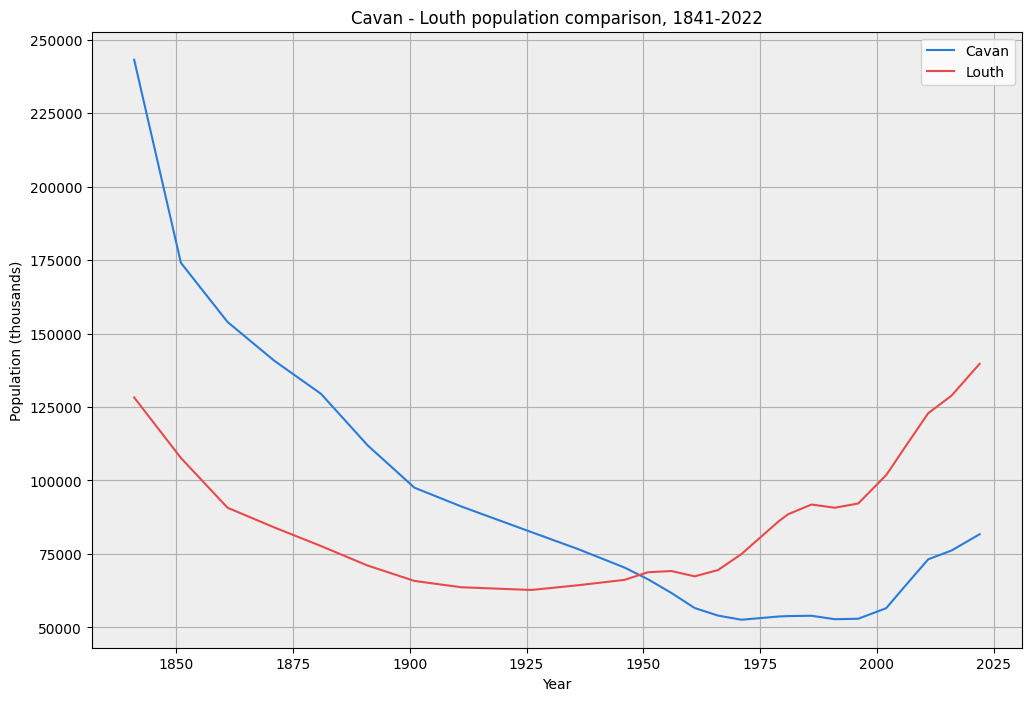

In [210]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

county1.plot(x="CensusYear", y="VALUE", kind="line", marker="None", linestyle="-", color="#2A7CDB", ax=ax, label=co1)
county2.plot(x="CensusYear", y="VALUE", kind="line", marker="None", linestyle="-", color="#E84A4A", ax=ax, label=co2)

title_string = co1 +" - "+ co2 +" population comparison, 1841-2022"

plt.title(title_string)
plt.xlabel('Year')
plt.ylabel('Population (thousands)')
ax.set_facecolor('#EEEEEE') 
plt.grid(True)

save_fig = '1841-2022-'+co1+'-'+co2+'.png'
#plt.savefig(save_fig)

# Show the plot
plt.show()


In [211]:
def pairCountyProvince(value):
    leinster = ["Carlow","Dublin","Kildare","Kilkenny","Laois","Longford","Louth","Meath","Offaly","Westmeath","Wexford","Wicklow"]
    munster = ["Clare", "Cork", "Kerry","Limerick","Tipperary","Waterford"]
    connaught = ["Galway","Leitrim","Mayo","Roscommon","Sligo"]
    ulster = ["Cavan","Donegal","Monaghan"]
    
    if value in leinster:
        return "Leinster"
    elif value in munster:
        return "Munster"
    elif value in connaught:
        return "Connaught"
    elif value in ulster: 
        return "Ulster"

def calculateProvincePopulations():
    filtered_df = df[df['Sex'] == 'Both sexes']
    
    filtered_df['Province'] = filtered_df['County'].apply(pairCountyProvince)
    return filtered_df
    
df = calculateProvincePopulations()

In [212]:
def getProvinces(df,p1, p2):
    p1_prov = df[df["Province"] == p1]
    p1_summed = p1_prov.groupby('CensusYear')['VALUE'].sum().reset_index()
    
    p2_prov = df[df["Province"] == p2]
    p2_summed = p2_prov.groupby('CensusYear')['VALUE'].sum().reset_index()
    
    return p1_summed, p2_summed

prov1,prov2 = getProvinces(df,"Connaught", "Munster")

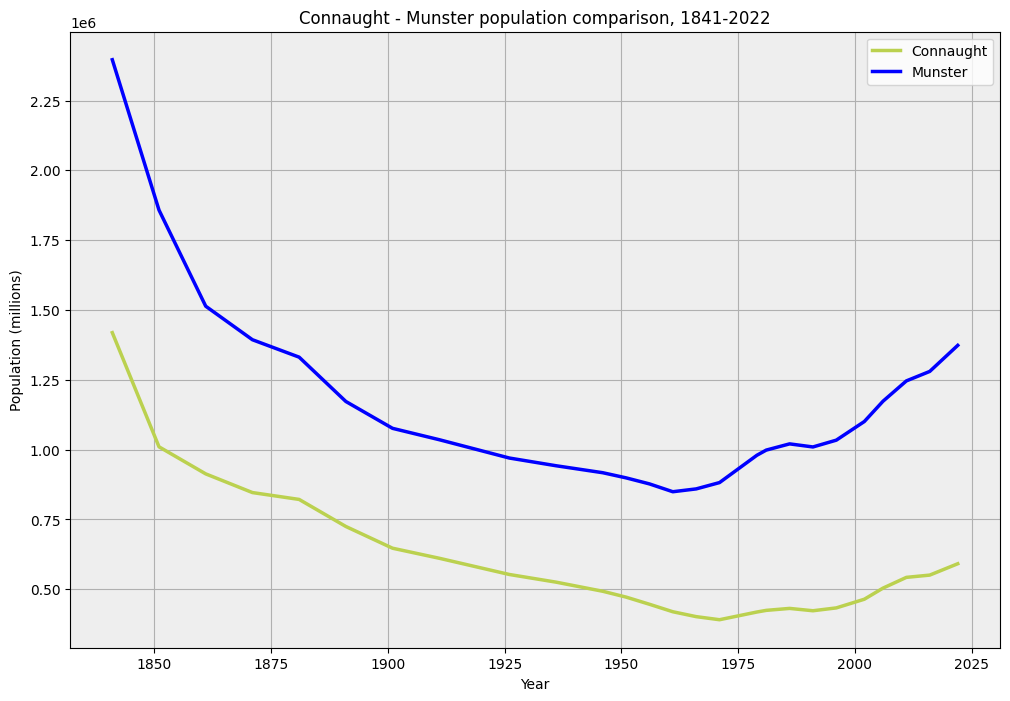

In [213]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

prov1.plot(x="CensusYear", y="VALUE", kind="line", marker="None", linestyle="-", linewidth=2.5, color="#BBD14F", ax=ax, label="Connaught")
prov2.plot(x="CensusYear", y="VALUE", kind="line", marker="None", linestyle="-", linewidth=2.5, color="blue", ax=ax, label="Munster")

title_string = 'Connaught - Munster population comparison, 1841-2022'

plt.title(title_string)
plt.xlabel('Year')
plt.ylabel('Population (millions)')
ax.set_facecolor('#EEEEEE') 
plt.grid(True)

plt.savefig('1841-2022-Connaught-Munster.png')

# Show the plot
plt.show()